In [1]:
import math

import matplotlib.pyplot as plt
import matplotlib.figure as fig
import pandas as pa
import pandas as pd
from matplotlib.patches import Polygon
arbres = pa.read_csv("./p2-arbres-fr.csv", sep=";")

id                          0
type_emplacement            0
domanialite                 1
arrondissement              0
complement_addresse    129494
numero                 160007
lieu                        0
id_emplacement              0
libelle_francais         1357
genre                       0
espece                   1207
variete                131568
circonference_cm            0
hauteur_m                   0
stade_developpement     29924
remarquable             32543
geo_point_2d_a              0
geo_point_2d_b              0
dtype: int64

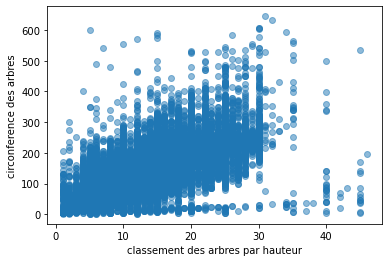

In [3]:
ht_moy = arbres.hauteur_m.mean()
type(arbres.hauteur_m)
echantillon_arbres = arbres.\
    where(0<arbres['hauteur_m']).where(arbres['hauteur_m']<=46).\
    where(arbres.circonference_cm < 650).where(arbres.circonference_cm > 0)
echantillon_arbres = echantillon_arbres.dropna(subset=['hauteur_m','circonference_cm'])
# print(echantillon_arbres)
ar_circ = echantillon_arbres.circonference_cm
type(echantillon_arbres)
plt.plot(echantillon_arbres['hauteur_m'], ar_circ, 'o', alpha=0.5)
plt.xlabel("classement des arbres par hauteur")
plt.ylabel("circonference des arbres")
echantillon_arbres.shape
echantillon_arbres.isna().sum()

In [4]:

print(ar_circ.describe())
print(echantillon_arbres.describe())

count    160007.000000
mean         92.425394
std          58.741806
min           1.000000
25%          50.000000
50%          80.000000
75%         125.000000
max         645.000000
Name: circonference_cm, dtype: float64
                 id  numero  circonference_cm      hauteur_m    remarquable  \
count  1.600070e+05     0.0     160007.000000  160007.000000  127464.000000   
mean   3.803267e+05     NaN         92.425394      10.371271       0.001412   
std    5.184533e+05     NaN         58.741806       5.158943       0.037552   
min    9.987400e+04     NaN          1.000000       1.000000       0.000000   
25%    1.872825e+05     NaN         50.000000       6.000000       0.000000   
50%    2.331190e+05     NaN         80.000000      10.000000       0.000000   
75%    2.770045e+05     NaN        125.000000      14.000000       0.000000   
max    2.023468e+06     NaN        645.000000      46.000000       1.000000   

       geo_point_2d_a  geo_point_2d_b  
count   160007.000000   1

In [5]:
import scipy.stats as st
import numpy as np

print(st.pearsonr(echantillon_arbres['hauteur_m'], ar_circ)[0])
print(np.cov(echantillon_arbres['hauteur_m'], ar_circ,ddof=0)[1,0])

0.8005029192595416
242.5873871182448


In [6]:
echantillon_arbres.isna().sum()

id                          0
type_emplacement            0
domanialite                 1
arrondissement              0
complement_addresse    129494
numero                 160007
lieu                        0
id_emplacement              0
libelle_francais         1357
genre                       0
espece                   1207
variete                131568
circonference_cm            0
hauteur_m                   0
stade_developpement     29924
remarquable             32543
geo_point_2d_a              0
geo_point_2d_b              0
dtype: int64

In [7]:
echantillon_arbres.describe()

,id,numero,circonference_cm,hauteur_m,remarquable,geo_point_2d_a,geo_point_2d_b
count,1.600070e+05,0.0,160007.000000,160007.000000,127464.000000,160007.000000,160007.000000
mean,3.803267e+05,NaN,92.425394,10.371271,0.001412,48.855827,2.346139
std,5.184533e+05,NaN,58.741806,5.158943,0.037552,0.025860,0.049323
min,9.987400e+04,NaN,1.000000,1.000000,0.000000,48.742290,2.210416
25%,1.872825e+05,NaN,50.000000,6.000000,0.000000,48.836804,2.307585
50%,2.331190e+05,NaN,80.000000,10.000000,0.000000,48.855185,2.348743
75%,2.770045e+05,NaN,125.000000,14.000000,0.000000,48.874124,2.383173
max,2.023468e+06,NaN,645.000000,46.000000,1.000000,48.911485,2.469759


[ 0.  9. 18. 27. 36. 45.]
[ 4.5 13.5 22.5 31.5 40.5 49.5]


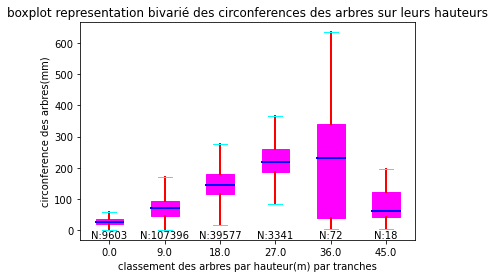

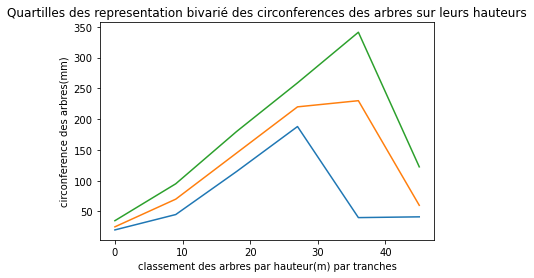

In [8]:
taille_classe = 9 # taille des classes pour la discrétisation

groupes = [] # va recevoir les données agrégées à afficher

# on calcule des tranches allant de 0 au solde maximum par paliers de taille taille_classe
tranches = np.arange(0, max(echantillon_arbres['hauteur_m']), taille_classe)
print(tranches)
tranches += taille_classe/2 # on décale les tranches d'une demi taille de classe
print(tranches)
indices = np.digitize(echantillon_arbres['hauteur_m'], tranches) # associe chaque hauteur à son numéro de classe

for ind, tr in enumerate(tranches): # pour chaque tranche, ind reçoit le numéro de tranche et tr la tranche en question
    circonferences = echantillon_arbres.loc[indices==ind,"circonference_cm"] # sélection des individus de la tranche ind
    if len(circonferences) > 0:
        g = {
            'valeurs': circonferences,
            'centre_classe': tr-(taille_classe/2),
            'taille': len(circonferences),
            'quartiles': [np.percentile(circonferences,p) for p in [25,50,75]]
        }
        groupes.append(g)

# affichage des boxplots
boxplotElements = plt.boxplot([g["valeurs"] for g in groupes],
            positions= [g["centre_classe"] for g in groupes],  # abscisses des boxplots
            showfliers=False,  # on ne prend pas en compte les outliers
            widths= taille_classe*0.5,  # largeur graphique des boxplots
            patch_artist=True,
            autorange=True)

# affichage des effectifs de chaque classe
for g in groupes:
    plt.text(g["centre_classe"],0,"N:{}".format(g["taille"]),
             horizontalalignment='center',
             verticalalignment='top')

for element in boxplotElements['medians']:
    element.set_color('blue')
    element.set_linewidth(2)
for element in boxplotElements['boxes']:
    element.set_color('magenta')
    element.set_linewidth(1)
for element in boxplotElements['whiskers']:
    element.set_color('red')
    element.set_linewidth(2)
for element in boxplotElements['caps']:
    element.set_color('cyan')
plt.title("boxplot representation bivarié des circonferences des arbres sur leurs hauteurs")
plt.xlabel("classement des arbres par hauteur(m) par tranches")
plt.ylabel("circonference des arbres(mm)")
plt.show()

# affichage des quartiles
for n_quartile in range(3):
    plt.plot([g["centre_classe"] for g in groupes],
             [g["quartiles"][n_quartile] for g in groupes])
    plt.title("Quartilles des representation bivarié des circonferences des arbres sur leurs hauteurs")
    plt.xlabel("classement des arbres par hauteur(m) par tranches")
    plt.ylabel("circonference des arbres(mm)")
plt.show()

             id type_emplacement domanialite   arrondissement  \
0         99874            Arbre      Jardin   PARIS 7E ARRDT   
1         99875            Arbre      Jardin   PARIS 7E ARRDT   
2         99876            Arbre      Jardin   PARIS 7E ARRDT   
3         99877            Arbre      Jardin   PARIS 7E ARRDT   
4         99878            Arbre      Jardin  PARIS 17E ARRDT   
...         ...              ...         ...              ...   
198874  2023464            Arbre  Alignement  PARIS 20E ARRDT   
198875  2023465            Arbre  Alignement  PARIS 20E ARRDT   
198876  2023466            Arbre  Alignement  PARIS 20E ARRDT   
198877  2023467            Arbre  Alignement  PARIS 20E ARRDT   
198878  2023468            Arbre  Alignement  PARIS 20E ARRDT   

       complement_addresse  numero  \
0                      NaN     NaN   
1                      NaN     NaN   
2                      NaN     NaN   
3                      NaN     NaN   
4                      NaN   

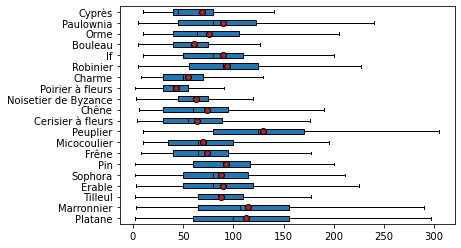

Platane       40020
Marronnier    23526
Tilleul       18665
Erable        14201
Sophora       10848
              ...  
Hiba              1
Grenadier         1
Pistachier        1
Papayer           1
Kalopanax         1
Name: libelle_francais, Length: 180, dtype: int64

In [9]:
# X = echantillon_arbres.libelle_francais
# Y = echantillon_arbres.hauteur_m
X = "libelle_francais"
# Y = "hauteur_m"
Y = "circonference_cm"
quantitative = Y.split('_')
# sous_echantillon = arbres[(arbres["hauteur_m"]<45) & (arbres["hauteur_m"]>0)].copy()
sous_echantillon = arbres[(arbres[Y] < echantillon_arbres[Y].max()) & (arbres[Y]>echantillon_arbres[Y].min())].copy()
print(sous_echantillon)
# modalites = sous_echantillon[X].unique()
modalites = sous_echantillon[X].value_counts().head(20).copy()
modalites
groupes = []
names = []
# groupes.append([sous_echantillon.libelle_francais.unique()])
# groupes
# groupes.append(sous_echantillon[sous_echantillon.where(m == sous_echantillon.libelle_francais)][sous_echantillon.hauteur_m])
# sous_echantillon
# groupes.append([X.where(X == m).dropna().unique()])
# groupes.append([Y.where(X == m).dropna()])
for nom,valeur in modalites.iteritems():
     groupes.append(sous_echantillon[sous_echantillon[X]==nom][Y])
     names.append(nom)
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

plt.boxplot(groupes, labels=names, showfliers=False, medianprops=medianprops,
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops, autorange=True)
plt.show()
sous_echantillon[X].value_counts()

In [10]:
modalites = sous_echantillon[X].value_counts(sort=False).head(10)
for k,v in modalites.iteritems():
    print(k)

modalites
sous_echantillon.hauteur_m.describe()

Marronnier
If
Erable
Arbre à miel
Platane
Sophora
Prunus n. sp.
Hêtre
Micocoulier
Tilleul


count    174175.000000
mean         15.036681
std        2113.021289
min           0.000000
25%           5.000000
50%          10.000000
75%          13.000000
max      881818.000000
Name: hauteur_m, dtype: float64

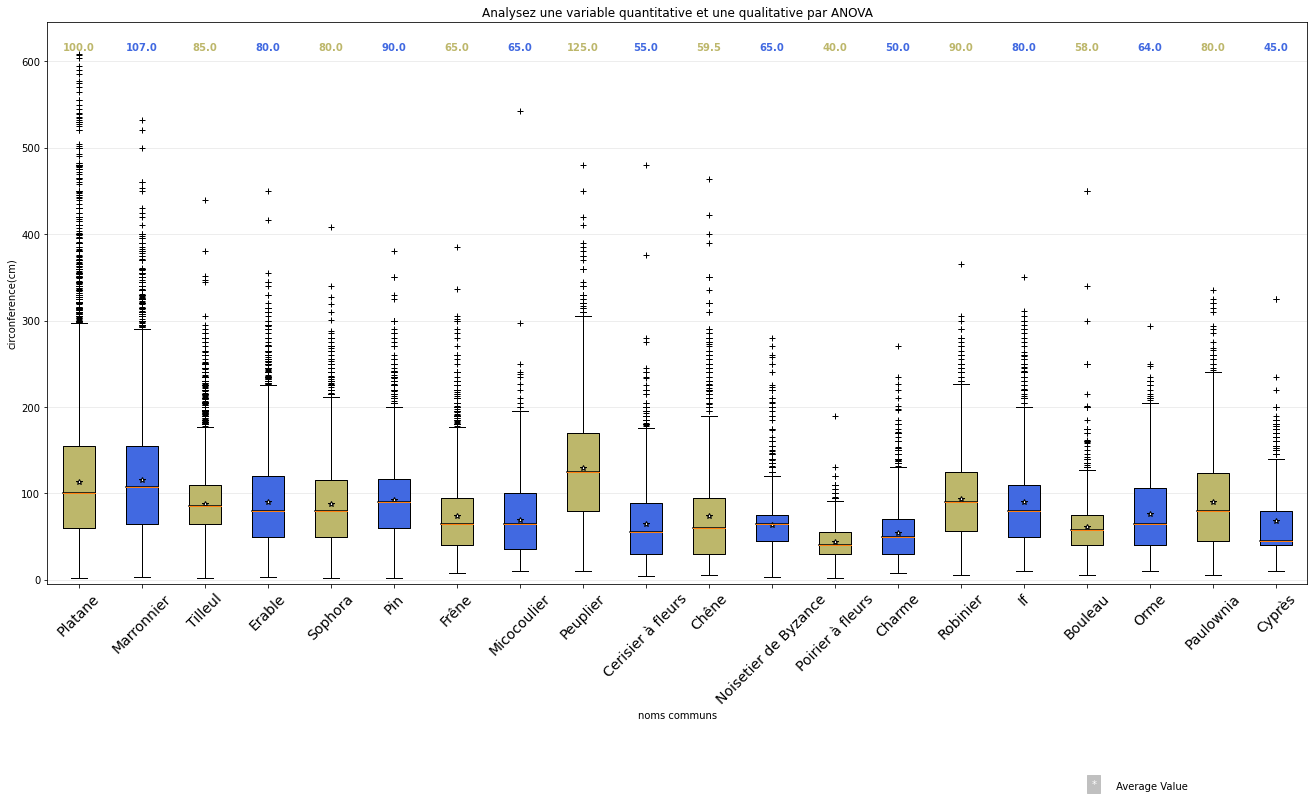

In [11]:
N = 100
fig, ax1 = plt.subplots(figsize=(20, 12))
fig.canvas.manager.set_window_title('A Boxplot Example')
fig.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)

bp = ax1.boxplot(groupes, notch=0, sym='+', vert=1, whis=1.5)
plt.setp(bp['boxes'], color='black')
plt.setp(bp['whiskers'], color='black')
plt.setp(bp['fliers'], color='red', marker='+')

# Add a horizontal grid to the plot, but make it very light in color
# so we can use it for reading data values but not be distracting
ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)

ax1.set(
    axisbelow=True,  # Hide the grid behind plot objects
    title='Analysez une variable quantitative et une qualitative par ANOVA',
    xlabel='noms communs',
    ylabel=f'{quantitative[0]}({quantitative[1]})',
)

# Now fill the boxes with desired colors
box_colors = ['darkkhaki', 'royalblue']
num_boxes = len(groupes)
medians = np.empty(num_boxes)
for i in range(num_boxes):
    box = bp['boxes'][i]
    box_x = []
    box_y = []
    for j in range(5):
        box_x.append(box.get_xdata()[j])
        box_y.append(box.get_ydata()[j])
    box_coords = np.column_stack([box_x, box_y])
    # Alternate between Dark Khaki and Royal Blue
    ax1.add_patch(Polygon(box_coords, facecolor=box_colors[i % 2]))
    # Now draw the median lines back over what we just filled in
    med = bp['medians'][i]
    median_x = []
    median_y = []
    for j in range(2):
        median_x.append(med.get_xdata()[j])
        median_y.append(med.get_ydata()[j])
        ax1.plot(median_x, median_y, 'k')
    medians[i] = median_y[0]
    # Finally, overplot the sample averages, with horizontal alignment
    # in the center of each box
    ax1.plot(np.average(med.get_xdata()), np.average(groupes[i]),
             color='w', marker='*', markeredgecolor='k')

# Set the axes ranges and axes labels
ax1.set_xlim(0.5, num_boxes + 0.5)
top = echantillon_arbres[Y].max()
bottom = -5
ax1.set_ylim(bottom, top)
ax1.set_xticklabels(names,
                    rotation=45, fontsize=14)

# Due to the Y-axis scale being different across samples, it can be
# hard to compare differences in medians across the samples. Add upper
# X-axis tick labels with the sample medians to aid in comparison
# (just use two decimal places of precision)
pos = np.arange(num_boxes) + 1
upper_labels = [str(round(s, 2)) for s in medians]
weights = ['bold', 'semibold']
for tick, label in zip(range(num_boxes), ax1.get_xticklabels()):
    k = tick % 2
    ax1.text(pos[tick], .95, upper_labels[tick],
             transform=ax1.get_xaxis_transform(),
             horizontalalignment='center', size='medium',
             weight=weights[k], color=box_colors[k])

# Finally, add a basic legend

fig.text(0.80, 0.015, '*', color='white', backgroundcolor='silver',
         weight='roman', size='medium')
fig.text(0.815, 0.013, ' Average Value', color='black', weight='roman',
         size='medium')

plt.show()


Évaluation du modèle : les variables sont-elles corrélées ?

Commentaire : le retour de la fonction est en fait le carré du coefficient de corrélation linéaire.
\begin{equation}
    \label{eq.equation}
        R^2 = r^2_{XY}
\end{equation}

In [14]:
import math
def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()  if len(yi_classe) != 0 else 0})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])

    return SCE/SCT

eta_squared(sous_echantillon[X], sous_echantillon[Y])

SyntaxError: invalid syntax (Temp/ipykernel_9580/1833075059.py, line 1)

In [13]:
arbres.arrondissement.unique()
arbres.head(2)


,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,99874,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,NaN,20,5,NaN,0.0,48.857620,2.320962
1,99875,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,20,If,Taxus,baccata,NaN,65,8,A,NaN,48.857656,2.321031
